In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/loan_default_clean.csv')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,LAST_DELINQ_12-24 months,LAST_DELINQ_24-36 months,LAST_DELINQ_36-48 months,LAST_DELINQ_48-LONG months,LAST_DELINQ_Never Defaulted
0,0.0,0.0,0.0,0.00,0.00,0.0,8736,0.00,0.0,8339,...,0,0,0,0,0,0,0,0,0,1
1,2500.0,2500.0,2500.0,13.98,85.42,20004.0,4871,19.86,0.0,6666,...,1,0,0,0,0,0,0,0,0,1
2,5000.0,5000.0,5000.0,15.95,175.67,59000.0,4901,19.57,0.0,10806,...,0,0,0,0,0,0,0,0,1,0
3,7000.0,7000.0,7000.0,9.91,225.58,53796.0,4444,10.80,3.0,9376,...,1,0,0,0,0,0,0,0,0,0
4,2000.0,2000.0,2000.0,5.42,60.32,30000.0,4444,3.60,0.0,17836,...,0,0,0,0,0,0,0,0,1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38413 entries, 0 to 38412
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38413 non-null  float64
 1   funded_amnt                          38413 non-null  float64
 2   funded_amnt_inv                      38413 non-null  float64
 3   int_rate                             38413 non-null  float64
 4   installment                          38413 non-null  float64
 5   annual_inc                           38413 non-null  float64
 6   issue_d                              38413 non-null  int64  
 7   dti                                  38413 non-null  float64
 8   delinq_2yrs                          38413 non-null  float64
 9   earliest_cr_line                     38413 non-null  int64  
 10  inq_last_6mths                       38413 non-null  float64
 11  open_acc                    

## **Hyper-Parameter Tuning and Grid Search on DT**

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('repay_fail', axis = 1), df.repay_fail, test_size = .3, random_state = 591)

In [5]:
## Gini and Entropy
## max_depth, max_leaf_nodes

## Grid Search + CV
## 1) create a grid
grid = {'criterion': ['gini', 'entropy'],
        'max_depth': [2,4,8,None],
        'max_leaf_nodes': [10, 20, 30, None]}

In [7]:
## 2) Instance of GridSearchCV using estimator (unrestricted), parallel processing
from sklearn.model_selection import GridSearchCV

dt = GridSearchCV(DecisionTreeClassifier(), param_grid = grid, n_jobs = -1)

In [12]:
## 3) fit on training data set
dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, None],
                         'max_leaf_nodes': [10, 20, 30, None]})

In [13]:
## 4) Check the best parameters
dt.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}

In [14]:
## Estimated accuracy
dt.best_score_

0.9709917515016683

Let's suppose you want to increase detection rate (recall). Then you want to change scoring  to maximize recall.

In [16]:
dt1 = GridSearchCV(DecisionTreeClassifier(), param_grid = grid, n_jobs = -1, scoring = 'recall')

## **Check Performance**

In [20]:
dt

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, None],
                         'max_leaf_nodes': [10, 20, 30, None]})

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

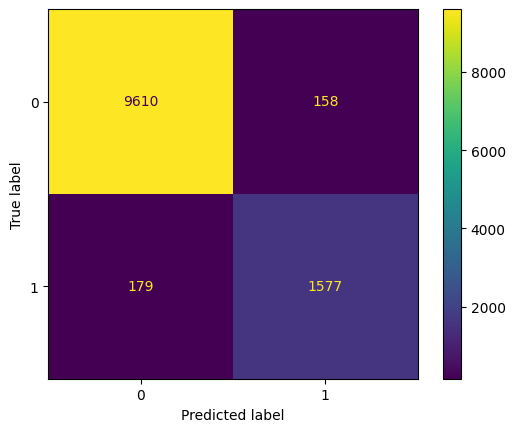

In [23]:
## dt is NOW the tree with the best hyper-parameters, so NO need to refit
ConfusionMatrixDisplay(confusion_matrix(y_test, dt.predict(X_test))).plot()

In [26]:
## Which variables are the most important? attribute on a DecisionTreeClassifier
## To refit
dt_best = DecisionTreeClassifier(**dt.best_params_)

dt_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
dt_best.feature_importances_

array([7.24636941e-03, 1.36163446e-02, 8.46587601e-02, 5.63077084e-03,
       2.07934718e-01, 8.28836450e-03, 5.27836099e-03, 4.56437798e-03,
       6.90393943e-04, 7.66888247e-03, 2.29256257e-03, 2.20587264e-03,
       4.97623521e-04, 2.99002790e-03, 4.31647712e-03, 5.72274547e-03,
       2.07751551e-01, 9.63637840e-02, 4.80106469e-02, 1.88100734e-01,
       4.14534849e-02, 4.21179384e-02, 7.45792179e-04, 0.00000000e+00,
       2.75471206e-04, 0.00000000e+00, 1.27835787e-03, 5.79022636e-04,
       3.16094215e-04, 9.29341294e-04, 1.97366065e-04, 4.61974164e-04,
       1.80378557e-04, 0.00000000e+00, 3.95857635e-04, 4.52791530e-04,
       3.96921212e-04, 2.64474468e-04, 0.00000000e+00, 1.42835502e-04,
       4.80482099e-04, 7.28449652e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.74209000e-04,
       0.00000000e+00, 1.54812962e-03, 0.00000000e+00, 0.00000000e+00,
       2.52153199e-04, 2.50432396e-04, 1.67550834e-04, 1.07515530e-03,
      

## **Bagging Ensemble**

In [28]:
## import
from sklearn.ensemble import BaggingClassifier

## recommendation: use a decision tree (unrestricted)
bag = BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators = 50, n_jobs = -1, oob_score = True)

## fit
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  n_jobs=-1, oob_score=True)

In [29]:
## Estimated accuracy of the model
## only using the training data (not peeking on the test)
bag.oob_score_

0.977909182193462

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, bag.predict(X_test))

0.9780458174245054

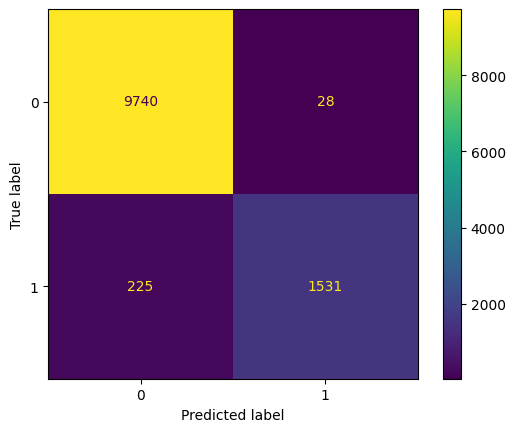

In [31]:
ConfusionMatrixDisplay(confusion_matrix(y_test, bag.predict(X_test))).plot()

## **Random Forests**

In [32]:
## import
from sklearn.ensemble import RandomForestClassifier

## instance
rf = RandomForestClassifier(n_estimators = 120, oob_score=True)  ## does benefit from gridsearch

## fit
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120, oob_score=True)

In [33]:
## feature importances
rf.feature_importances_

array([5.14392425e-02, 5.60012707e-02, 7.54951868e-02, 3.43042369e-02,
       6.98566976e-02, 1.56062951e-02, 2.58697120e-02, 1.57240839e-02,
       2.58381980e-03, 1.53014908e-02, 9.02325660e-03, 1.03271674e-02,
       2.25924901e-03, 1.58552518e-02, 1.60840007e-02, 1.29850258e-02,
       1.85652461e-01, 1.44584857e-01, 4.46971904e-02, 9.24518101e-02,
       3.87654872e-02, 1.88069449e-02, 2.17655943e-03, 1.49069736e-03,
       1.62204072e-03, 1.28796247e-03, 1.53455841e-03, 1.00110935e-03,
       1.09476270e-03, 9.59323383e-04, 9.23080664e-04, 1.62832310e-03,
       1.28595575e-03, 2.04288715e-06, 4.46447125e-04, 1.22976416e-03,
       2.35029689e-03, 2.36252520e-03, 2.80983066e-03, 1.66493248e-03,
       2.83632284e-03, 5.38684733e-04, 1.19930524e-03, 4.72383929e-04,
       9.63307020e-04, 6.23393028e-04, 5.12728356e-04, 1.62274436e-03,
       1.91318070e-04, 2.24842643e-03, 5.77907080e-04, 4.90936904e-04,
       1.53288321e-03, 1.12090199e-03, 1.35333357e-03, 1.65256304e-03,
      

In [34]:
## Estimated accuracy of the model
## only using the training data (not peeking on the test)
rf.oob_score_

0.9677563315854066

In [35]:

accuracy_score(y_test, rf.predict(X_test))

0.9681534189517529

In [36]:
from sklearn.ensemble import GradientBoostingClassifier